In [1]:
import os
import sys; sys.path.insert(0, os.path.abspath("../"))
import cv2
import numpy as np 
import matplotlib.pyplot as plt
# from utils.plots import get_image, get_image_and_plot
from tqdm import tqdm
import pandas as pd
from scipy.stats import skew, kurtosis
from skimage.measure import shannon_entropy
from pipeline.preprocessing import SkinLesionPreprocessing
from dataset.dataset import SkinLesion_Dataset
from pipeline.feature_extraction import FeaturesExtraction
from tqdm import tqdm
import pyarrow

In [2]:
data = SkinLesion_Dataset()
preproc = SkinLesionPreprocessing()
data.md_df.head(10)

,img_id,label,sublabel,size,height,width,path,split
0,8391,nevus,nev,"(450, 600, 3)",450,600,../data/binary/val/nevus/nev08391.jpg,val
1,8972,nevus,nev,"(450, 600, 3)",450,600,../data/binary/val/nevus/nev08972.jpg,val
2,8399,nevus,nev,"(450, 600, 3)",450,600,../data/binary/val/nevus/nev08399.jpg,val
3,8149,nevus,nev,"(768, 1024, 3)",768,1024,../data/binary/val/nevus/nev08149.jpg,val
4,8604,nevus,nev,"(450, 600, 3)",450,600,../data/binary/val/nevus/nev08604.jpg,val
5,8841,nevus,nev,"(680, 1024, 3)",680,1024,../data/binary/val/nevus/nev08841.jpg,val
6,7970,nevus,nev,"(685, 1024, 3)",685,1024,../data/binary/val/nevus/nev07970.jpg,val
7,7899,nevus,nev,"(690, 1024, 3)",690,1024,../data/binary/val/nevus/nev07899.jpg,val
8,8211,nevus,nev,"(674, 962, 3)",674,962,../data/binary/val/nevus/nev08211.jpg,val
9,8938,nevus,nev,"(1024, 1024, 3)",1024,1024,../data/binary/val/nevus/nev08938.jpg,val


In [16]:
# data_sample_train_nevus = data.md_df.loc[(data.md_df.split == 'train') & (data.md_df.label == 'nevus'), :].sample(400, replace=False)
# data_sample_train_others = data.md_df.loc[(data.md_df.split == 'train') & (data.md_df.label == 'others'), :].sample(400, replace=False)
# data_sample_val_nevus = data.md_df.loc[(data.md_df.split == 'val') & (data.md_df.label == 'nevus'), :].sample(100, replace=False)
# data_sample_val_others = data.md_df.loc[(data.md_df.split == 'val') & (data.md_df.label == 'others'), :].sample(100, replace=False)
# data_sample = pd.concat([data_sample_train_nevus, data_sample_train_others, data_sample_val_nevus, data_sample_val_others])
# data_sample

,img_id,label,sublabel,size,height,width,path,split
8211,2005,nevus,nev,"(450, 600, 3)",450,600,../data/binary/train/nevus/nev02005.jpg,train
10349,3045,nevus,nev,"(680, 1024, 3)",680,1024,../data/binary/train/nevus/nev03045.jpg,train
7087,1714,nevus,nev,"(768, 1024, 3)",768,1024,../data/binary/train/nevus/nev01714.jpg,train
6408,6957,nevus,nev,"(1024, 1024, 3)",1024,1024,../data/binary/train/nevus/nev06957.jpg,train
4482,479,nevus,nev,"(450, 600, 3)",450,600,../data/binary/train/nevus/nev00479.jpg,train
...,...,...,...,...,...,...,...,...
3092,2860,others,mel,"(1024, 1024, 3)",1024,1024,../data/binary/val/others/mel02860.jpg,val
2225,544,others,ack,"(450, 600, 3)",450,600,../data/binary/val/others/ack00544.jpg,val
2238,3364,others,mel,"(680, 1024, 3)",680,1024,../data/binary/val/others/mel03364.jpg,val
3083,455,others,scc,"(1024, 1024, 3)",1024,1024,../data/binary/val/others/scc00455.jpg,val


In [22]:
# data_sample.to_csv('../data/binary/data_1000_sample.csv')

In [3]:
data_sample = pd.read_csv('../data/binary/data_1000_sample.csv', index_col=[0])
data_sample

,img_id,label,sublabel,size,height,width,path,split
8211,2005,nevus,nev,"(450, 600, 3)",450,600,../data/binary/train/nevus/nev02005.jpg,train
10349,3045,nevus,nev,"(680, 1024, 3)",680,1024,../data/binary/train/nevus/nev03045.jpg,train
7087,1714,nevus,nev,"(768, 1024, 3)",768,1024,../data/binary/train/nevus/nev01714.jpg,train
6408,6957,nevus,nev,"(1024, 1024, 3)",1024,1024,../data/binary/train/nevus/nev06957.jpg,train
4482,479,nevus,nev,"(450, 600, 3)",450,600,../data/binary/train/nevus/nev00479.jpg,train
...,...,...,...,...,...,...,...,...
3092,2860,others,mel,"(1024, 1024, 3)",1024,1024,../data/binary/val/others/mel02860.jpg,val
2225,544,others,ack,"(450, 600, 3)",450,600,../data/binary/val/others/ack00544.jpg,val
2238,3364,others,mel,"(680, 1024, 3)",680,1024,../data/binary/val/others/mel03364.jpg,val
3083,455,others,scc,"(1024, 1024, 3)",1024,1024,../data/binary/val/others/scc00455.jpg,val


## Extract features

In [17]:
def segment(img):

    r_norm = img[:,:,2]*(1/np.sqrt(np.sum(img.astype(np.float32)**2, axis=-1)))
    rnormg = (cv2.GaussianBlur(r_norm, ksize = (0,0), sigmaX=3, borderType = cv2.BORDER_DEFAULT)*255).astype(np.uint8)
    _,mask_r = cv2.threshold(rnormg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Filling holes
    contour_r,_ = cv2.findContours(mask_r,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contour_r:
        cv2.drawContours(mask_r,[cnt],0,255,-1)
    
    return mask_r

cfe = FeaturesExtraction()

In [8]:
data_sample.iloc[613]

img_id                                           759
label                                         others
sublabel                                         mel
size                                 (1024, 1024, 3)
height                                          1024
width                                           1024
path        ../data/binary/train/others/mel00759.jpg
split                                          train
Name: 18259, dtype: object

In [9]:
indexes = data_sample.index.values
indexes[613]

18259

In [29]:
def crop_image(image: np.ndarray, threshold = 100):
        """
        Crop the image to get the region of interest. Remove the vignette frame.
        Analyze the value of the pixels in the diagonal of the image, from 0,0 to h,w and
        take the points where this value crosses the threshold by the first time and for last.
        
        Args:
        - img (numpy ndarray): Image to crop.
        - threshold (int): Value to split the diagonal into image and frame.

        Returns:
            np.ndarray: Cropped image
            tuple: Shape of cropped image
        """
        # Get the image dimensions
        h, w = image.shape[:2]

        # Get the coordinates of the pixels in the diagonal
        if h != 1024:
            y_coords = ([i for i in range(0, h, 3)], [i for i in range(h - 3, -1, -3)])
        y_coords = ([i for i in range(0, h, 4)], [i for i in range(h - 4, -1, -4)])
        x_coords = ([i for i in range(0, w, 4)], [i for i in range(0, w, 4)])

        # Get the mean value of the pixels in the diagonal, form 0,0 to h,w 
        # and from h,0 to 0,w
        coordinates = {'y1_1': 0, 'x1_1': 0, 'y2_1': h, 'x2_1': w, 'y1_2': h, 'x1_2': 0, 'y2_2': 0, 'x2_2': w}
        for i in range(2):
            d = []
            y1_aux, x1_aux = 0, 0
            y2_aux, x2_aux = h, w 
            for y, x in zip(y_coords[i], x_coords[i]):
                d.append(np.mean(image[y, x, :]))

            # Get the location of the first point where the threshold is crossed
            for idx, value in enumerate(d):
                if value >= threshold:
                    coordinates['y1_' + str(i + 1)] = y_coords[i][idx]
                    coordinates['x1_' + str(i + 1)] = x_coords[i][idx]
                    break

            # Get the location of the last point where the threshold is crossed
            for idx, value in enumerate(reversed(d)):
                if value >= threshold:
                    coordinates['y2_' + str(i + 1)] = y_coords[i][-idx if idx != 0 else -1]
                    coordinates['x2_' + str(i + 1)] = x_coords[i][-idx if idx != 0 else -1]
                    break

        # Set the coordinates to crop the image
        y1 = max(coordinates['y1_1'], coordinates['y2_2'])
        y2 = min(coordinates['y2_1'], coordinates['y1_2'])
        x1 = max(coordinates['x1_1'], coordinates['x1_2'])
        x2 = min(coordinates['x2_1'], coordinates['x2_2'])

        if (y2 < y1):
            y1 = coordinates['y2_2']
            y2 = coordinates['y2_1']

        if (x2 < x1):
            x1 = coordinates['x1_1']
            x2 = coordinates['x2_2']
        
        image_cropped = image[y1:y2, x1:x2, :]
        # image_cropped_size = image_cropped.shape

        return image_cropped, coordinates

In [38]:
x = data[18259]['img']
# x, coords = crop_image(x)
x.shape

(1024, 1024, 3)

In [33]:
coords

{'y1_1': 184,
 'x1_1': 184,
 'y2_1': 336,
 'x2_1': 336,
 'y1_2': 432,
 'x1_2': 588,
 'y2_2': 188,
 'x2_2': 832}

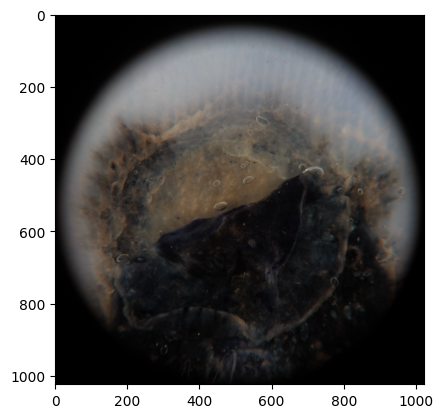

In [39]:
plt.imshow(x)

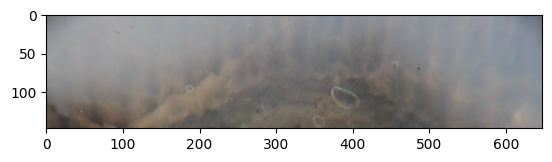

In [37]:
plt.imshow(x)

In [14]:
img = data[9890]['img']
img = preproc.preprocess(img)
mask = segment(img)

feat = cfe.extract_features(img, mask)

/tmp/ipykernel_53790/1436882556.py:3: RuntimeWarning: divide by zero encountered in divide
  r_norm = img[:,:,2]*(1/np.sqrt(np.sum(img.astype(np.float32)**2, axis=-1)))
/tmp/ipykernel_53790/1436882556.py:3: RuntimeWarning: invalid value encountered in multiply
  r_norm = img[:,:,2]*(1/np.sqrt(np.sum(img.astype(np.float32)**2, axis=-1)))


In [50]:
data_sample.iloc[18259,]

,img_id,label,sublabel,size,height,width,path,split


In [51]:
data_sample.index.values[613:].shape

(387,)

In [6]:
all_feat = []
labels = []

for i in tqdm(data_sample.index.values[613:], total=387):
    img = data[i]['img']
    img = preproc.preprocess(img)
    mask = segment(img)

    labels.append(data[i]['label'])
    all_feat.append(cfe.extract_features(img, mask))

df_387 = pd.DataFrame(all_feat, columns=cfe.features_names)
df_387['label'] = labels
df_387.to_feather('../data/binary/ds387_features.f') 


100%|██████████| 387/387 [20:23<00:00,  3.16s/it] 


## Classifer

In [4]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score

In [6]:
df = pd.read_feather('../data/binary/ds1000_features.f')
df

,global_rgb_mean_1,global_rgb_mean_2,global_rgb_mean_3,global_rgb_std_1,global_rgb_std_2,global_rgb_std_3,global_rgb_skew_1,global_rgb_skew_2,global_rgb_skew_3,global_rgb_kur_1,...,local_hsv_skew_1,local_hsv_skew_2,local_hsv_skew_3,local_hsv_kur_1,local_hsv_kur_2,local_hsv_kur_3,local_hsv_ent_1,local_hsv_ent_2,local_hsv_ent_3,label
0,233.410278,162.324402,170.615448,24.634218,29.350758,31.941591,-3.126802,-2.922931,-2.737665,13.086983,...,0.517842,-0.215365,-0.078190,-1.729880,-0.749449,-1.219490,3.625263,6.603793,7.128266,nevus
1,161.243118,116.935432,115.899689,67.682335,51.365749,50.815968,-0.956892,-0.308639,-0.246845,-0.350278,...,0.374698,0.035333,-1.022156,-1.852144,0.830507,0.848577,4.190969,6.576946,6.977806,nevus
2,163.638062,149.081650,145.898560,14.277949,23.912144,31.653650,-2.941918,-2.791926,-2.506644,8.290103,...,0.181642,-1.304465,0.148821,-0.488802,1.191417,-0.507097,2.908433,5.975254,5.578350,nevus
3,162.054092,156.700272,151.441574,19.930523,31.446280,40.643238,-3.281563,-2.654517,-2.185384,11.140835,...,-0.220330,-0.745734,-0.526534,-1.260615,-0.288970,-1.010442,3.777607,6.517842,6.562462,nevus
4,180.116974,145.635147,146.829025,12.343626,34.559044,47.362530,-1.217713,-0.744534,-0.707863,0.742766,...,5.467453,-0.427335,-0.066131,28.058980,-0.874860,-0.900924,3.154020,6.557076,5.479958,nevus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,182.845703,162.772049,146.956924,22.817598,29.869671,33.990543,-3.169723,-1.867206,-1.212469,11.845105,...,5.553718,0.749792,-1.380261,30.247867,0.244036,0.755363,4.462614,6.587884,6.405933,others
996,189.775024,132.203018,128.622055,5.141215,13.371437,15.927147,-0.692534,-0.522110,-0.681222,1.126122,...,2.740288,0.546554,-0.617885,5.523847,-0.029864,0.404142,3.251255,5.672496,4.422095,others
997,223.622818,198.861801,185.503540,28.066513,49.715408,63.888485,-1.436381,-0.900379,-0.714310,1.505975,...,-0.522070,0.759234,-0.718166,1.891386,0.847696,0.216139,2.301236,6.912207,6.648158,others
998,159.617874,143.177765,138.157776,7.259674,16.147001,23.450096,-0.787748,0.008085,-0.438318,1.703979,...,4.218103,0.547971,-1.341055,16.101893,-0.220937,2.962121,4.258150,6.123771,4.505319,others


In [7]:
# data preparation

df.replace({'nevus': 1, 'others': 0}, inplace=True)

df_train = df.iloc[:800, :].sample(frac=1, random_state=42)
df_val = df.iloc[800:, :].sample(frac=1, random_state=42)
# df_val

X_train, y_train = df_train.iloc[:, :120].to_numpy(dtype=np.float32), df_train.iloc[:, 120].to_numpy()
X_test, y_test = df_val.iloc[:, :120].to_numpy(dtype= np.float32), df_val.iloc[:, 120].to_numpy()


In [9]:
# scaler = preprocessing.MinMaxScaler()
# x_scaled = scaler.fit_transform(x)


# clf = RandomForestClassifier(
#                     n_estimators=1000, max_depth=data.shape[1]-4, n_jobs=-1, random_state=0)
# clf.fit(train_X, train_y)

classifier = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = { 
    'classifier__n_estimators': [50, 100, 500],
    'classifier__max_depth': [50, 70, 100],
}

#Let's apply a stratified 10-fold cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Let's build a pipeline with only a scaler and a linear SVM
pipe = Pipeline([('scaler', StandardScaler()),('classifier', classifier)]) #SVC(kernel='linear'))])



In [10]:


#Let's build a structure for the grid search with a set of parameters for the techniques in the pipeline
#Be careful to the double underscore between the name you chose in the pipeline and the name of the parameter
#Be careful also to the function logspace for the range of the C values
#parameters={'classifier__C': np.logspace(lower_value_C, higher_value_C, num=n_values,base=10)}

#Let's apply the grid search function
grid_search = GridSearchCV(pipe, param_grid, cv=cv)
#Let's train and test the learning system
grid_search.fit(X_train, y_train)

#Here we just print the best accuracy and the corresponding values for the parameters
print("TRAIN- The best parameters are %s with an accuracy of %0.4f"%(grid_search.best_params_, grid_search.best_score_))

# Store the trained models
with open('../data/binary/RF_800_color.sav', 'wb') as f:
                    pickle.dump(grid_search, f)
# with open(models_path / filename, 'rb') as f:
#     clf = pickle.load(f)

TRAIN- The best parameters are {'classifier__max_depth': 50, 'classifier__n_estimators': 500} with an accuracy of 0.8100


In [16]:
y_train_predicted = grid_search.predict(X_train)
y_test_predicted =  grid_search.predict(X_test)
print('F1 Score of train data: %0.4f' %f1_score(y_train,y_train_predicted,average='macro'), f'Acc: {accuracy_score(y_train, y_train_predicted)}')
print('F1 Score of test data: %0.4f' %f1_score(y_test,y_test_predicted,average='macro'), f'Acc: {accuracy_score(y_test, y_test_predicted)}')

F1 Score of train data: 1.0000 Acc: 1.0
F1 Score of test data: 0.7144 Acc: 0.715


In [36]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator= grid_search, X = X_train, y = y_train, scoring= "accuracy", cv=10, n_jobs=-1)
cv_scores

array([0.7125, 0.7875, 0.8625, 0.725 , 0.8   , 0.8375, 0.8375, 0.775 ,
       0.925 , 0.7875])

In [13]:
feature_importances = grid_search.best_estimator_._final_estimator.feature_importances_

In [37]:
cfe = FeaturesExtraction()
fimp_df = pd.DataFrame(data=[feature_importances], columns=cfe.features_names).transpose()
# fimp_df
fimp_df.sort_values(0,axis=0,inplace=True, ascending=False)
fimp_df.head(20)

,0
local_hsv_ent_1,0.032943
local_ycrbcb_mean_2,0.029430
local_lab_mean_2,0.028668
local_lab_kur_1,0.023509
global_lab_mean_2,0.022926
global_ycrbcb_mean_2,0.020760
local_hsv_mean_2,0.018460
local_rgb_kur_2,0.016939
local_hsv_skew_2,0.016731
local_ycrbcb_kur_1,0.016552


In [20]:
cfe.features_names[0]

'global_rgb_mean_1'

In [ ]:
# Asses performance
test_y_predicted = clf.predict_proba(test_X)[:, 1]
train_y_predicted = clf.predict_proba(train_X)[:, 1]

auc_full_features_test = roc_auc_score(test_y, test_y_predicted)
auc_full_features_train = roc_auc_score(train_y, train_y_predicted)
aucs_test.append(auc_full_features_test)
aucs_train.append(auc_full_features_train)

# Store on memory the classifier and the feature importances
clfs.append(clf)
feat_importances.append(clf.feature_importances_)